# Deepti Kulkarni

## Final Project - Individual Work


In [6]:
import csv
import re
import numpy as np
import pandas as pd
import urllib
from indeed import IndeedClient
from bs4 import BeautifulSoup as BS

In [7]:
#calculating number of records to be visible in final excel sheet

totalRecords = 100
topPercentageSkills = .20
threshold=topPercentageSkills*totalRecords

In [8]:

#this function is for matching our skills to the skills in the string

def extractSkills2(jobLink,skillList):
    skillDict={}
    String=extractInfoFromLink(jobLink).lower().replace(',', '').replace('.', '')
    for skill in skillList:
        if(String.find(skill.lower(), 0) > 0):
            skillDict[skill]=1
        else:
            skillDict[skill]=0
    return skillDict

# this function is for extracting skills paragraph from the string(string we are getting from the url.)

def extractInfoFromLink(jobLink):
    url=urllib.urlopen(jobLink)
    soup=BS(url,'html.parser')
    Text=soup.findAll('div',attrs={'class':"jobsearch-JobComponent-description"})
    return cleanhtml(str(Text))

# this function will remove the HTML tags from the string

def cleanhtml(Data):
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', Data)
    return cleantext  

#this function will use filename and will append all skills in the file

def readSkillsList(filename):
    skillsList=[]
    with open(filename, 'rb') as csvfile:
        skills = csv.reader(csvfile, delimiter=' ')
        for skill in skills:
            skillsList.append(' '.join(skill) + ' ')
    return skillsList


#  In this function we are getting all data from client using publisher ID

def getIndividualDF(client, user, job, location, count, skillfile):
    startList=np.arange(1,count*5,25) #taking total of 200 jobs. Since the limit is 25 at a time,using forloop.
    skillsList = readSkillsList(skillfile)
    counter =0
    SkillDf=pd.DataFrame()
    #print skillsList
    for num in startList:
        if counter >= count:
            break
        print num
        params = {
            'q' :job,#for the whole group we can use for loop for different jobtitles.
            'l' : location,
            'limit':25,     #25 records is the maximum we can get 
            'start':num,
            'radius':75,
            'userip' : "1.2.3.4",
            'useragent' : "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_8_2)"
        }
        search_response = client.search(**params)
        #print search_response
        for i in range(25):
            title=search_response["results"][i]['jobtitle']
            
            if job.lower() not in title.lower():#specifically for dataanalyst jobs..
                continue

            directSeriesfromJSON=pd.Series(search_response["results"][i],index=['jobtitle', 'company', 'city'])
            url=search_response["results"][i]['url']
            directSeriesfromJSONurl=pd.Series(search_response["results"][i],index=['url'])
            directSeriesfromJSONdate=pd.Series(search_response["results"][i],index=['date'])
            directSeriesfromJSON = directSeriesfromJSON.append(directSeriesfromJSONurl).append(directSeriesfromJSONdate)
            MatchSkill=extractSkills2(url,skillsList)
            seriesWithMatchSkill=pd.Series(MatchSkill,index=skillsList)
            combinedSeries=directSeriesfromJSON.append(seriesWithMatchSkill)
            #print combinedSeries
            SkillDf=SkillDf.append(combinedSeries,ignore_index=True)
            counter = counter +1
            if counter >= count:
                break

    #beacuse city,company and title was coming to the last in the dataframe & we need to represent them first.we modified tthe skillslist.       
    skillsList.insert(0, 'city')
    skillsList.insert(0, 'company')
    skillsList.insert(0, 'jobtitle')
    skillsList.insert(0, 'url')
    skillsList.insert(0, 'date')
    #print SkillDf
    SkillDf=SkillDf[skillsList] # for taking name title and city as a first columns
    idx = 0
    new_col = [user]*SkillDf.shape[0]  # can be a list, a Series, an array or a scalar   
    SkillDf.insert(loc=idx, column='User', value=new_col)
    print "this is skilldf",SkillDf
    return SkillDf

def mostRequiredSkills(SkillDf,threshold):
    s = SkillDf.sum()
    s=s[s>threshold]
    return s.index[6:].tolist()

In [9]:
#here we are geting individual dataframe with records per person

client = IndeedClient(publisher = 1388736040132108)

SkillDf5 = getIndividualDF(client, "Deepti", "Data Analyst", "North Carolina", totalRecords,"skills.csv")
print mostRequiredSkills(SkillDf5,threshold) 

SkillDf1 = getIndividualDF(client, "Neha", "Data Analyst", "Bay Area", totalRecords,"skills.csv")
print mostRequiredSkills(SkillDf1,threshold)

SkillDf2 = getIndividualDF(client, "Shivani", "Data Scientist", "Bay Area", totalRecords,"skills.csv")
print mostRequiredSkills(SkillDf2,threshold)

SkillDf3 = getIndividualDF(client, "Iswarya", "Data Scientist", "Texas", totalRecords,"skills.csv")
print mostRequiredSkills(SkillDf3,threshold)

SkillDf4 = getIndividualDF(client, "Tanvi", "Data Scientist", "New York", totalRecords,"skills.csv")
print mostRequiredSkills(SkillDf4,threshold)
 


1
26
51
76
101
126
151
176
201
226
251
276
301
326
351
376
401
426
451
476
this is skilldf       User                           date  \
0   Deepti  Tue, 25 Sep 2018 17:28:32 GMT   
1   Deepti  Thu, 06 Dec 2018 15:58:23 GMT   
2   Deepti  Tue, 27 Nov 2018 18:53:47 GMT   
3   Deepti  Wed, 26 Sep 2018 09:43:49 GMT   
4   Deepti  Fri, 30 Nov 2018 19:25:30 GMT   
5   Deepti  Sun, 18 Nov 2018 07:05:33 GMT   
6   Deepti  Sat, 08 Dec 2018 02:42:19 GMT   
7   Deepti  Mon, 15 Oct 2018 11:36:37 GMT   
8   Deepti  Thu, 15 Nov 2018 22:16:13 GMT   
9   Deepti  Fri, 21 Sep 2018 13:08:23 GMT   
10  Deepti  Fri, 07 Sep 2018 19:44:41 GMT   
11  Deepti  Wed, 24 Oct 2018 05:10:27 GMT   
12  Deepti  Mon, 12 Nov 2018 16:20:48 GMT   
13  Deepti  Thu, 15 Nov 2018 19:51:17 GMT   
14  Deepti  Sat, 01 Dec 2018 00:56:40 GMT   
15  Deepti  Thu, 29 Nov 2018 19:04:00 GMT   
16  Deepti  Fri, 30 Nov 2018 01:50:20 GMT   
17  Deepti  Thu, 04 Oct 2018 05:39:32 GMT   
18  Deepti  Fri, 30 Nov 2018 22:54:14 GMT   
19  Deept

26
51
76
101
126
151
176
201
226
251
this is skilldf     User                           date  \
0   Neha  Fri, 30 Nov 2018 06:29:37 GMT   
1   Neha  Thu, 08 Nov 2018 22:04:56 GMT   
2   Neha  Wed, 28 Nov 2018 08:22:33 GMT   
3   Neha  Mon, 26 Nov 2018 05:38:49 GMT   
4   Neha  Fri, 30 Nov 2018 18:34:44 GMT   
5   Neha  Wed, 21 Nov 2018 00:30:10 GMT   
6   Neha  Thu, 06 Dec 2018 20:42:48 GMT   
7   Neha  Tue, 04 Dec 2018 22:28:52 GMT   
8   Neha  Wed, 21 Nov 2018 14:43:34 GMT   
9   Neha  Sat, 24 Nov 2018 08:58:09 GMT   
10  Neha  Wed, 28 Nov 2018 17:48:24 GMT   
11  Neha  Wed, 05 Dec 2018 22:37:12 GMT   
12  Neha  Tue, 20 Nov 2018 23:34:36 GMT   
13  Neha  Sat, 29 Sep 2018 11:46:45 GMT   
14  Neha  Mon, 19 Nov 2018 22:59:22 GMT   
15  Neha  Thu, 06 Dec 2018 04:17:47 GMT   
16  Neha  Sat, 01 Dec 2018 00:07:31 GMT   
17  Neha  Sun, 14 Oct 2018 04:53:08 GMT   
18  Neha  Wed, 21 Nov 2018 05:12:41 GMT   
19  Neha  Wed, 31 Oct 2018 06:49:30 GMT   
20  Neha  Tue, 09 Oct 2018 19:12:19 GMT   
2

26
51
76
101
126
this is skilldf        User                           date  \
0   Shivani  Sat, 01 Dec 2018 08:21:22 GMT   
1   Shivani  Wed, 21 Nov 2018 00:09:56 GMT   
2   Shivani  Sun, 09 Dec 2018 08:28:44 GMT   
3   Shivani  Mon, 26 Nov 2018 18:11:19 GMT   
4   Shivani  Mon, 01 Oct 2018 22:24:03 GMT   
5   Shivani  Wed, 21 Nov 2018 10:03:15 GMT   
6   Shivani  Mon, 03 Sep 2018 21:19:31 GMT   
7   Shivani  Wed, 05 Dec 2018 21:07:26 GMT   
8   Shivani  Tue, 02 Oct 2018 09:41:38 GMT   
9   Shivani  Fri, 19 Oct 2018 00:18:35 GMT   
10  Shivani  Fri, 07 Dec 2018 21:13:42 GMT   
11  Shivani  Thu, 29 Nov 2018 16:34:49 GMT   
12  Shivani  Wed, 21 Nov 2018 10:01:49 GMT   
13  Shivani  Thu, 01 Nov 2018 22:01:52 GMT   
14  Shivani  Tue, 13 Nov 2018 22:28:06 GMT   
15  Shivani  Tue, 20 Nov 2018 00:10:00 GMT   
16  Shivani  Tue, 02 Oct 2018 00:08:17 GMT   
17  Shivani  Tue, 11 Sep 2018 22:08:08 GMT   
18  Shivani  Fri, 31 Aug 2018 22:08:34 GMT   
19  Shivani  Tue, 20 Nov 2018 00:20:10 GMT   
2

26
51
76
101
126
this is skilldf        User                           date  \
0   Iswarya  Mon, 12 Nov 2018 11:23:00 GMT   
1   Iswarya  Wed, 14 Nov 2018 16:32:59 GMT   
2   Iswarya  Tue, 11 Dec 2018 23:03:15 GMT   
3   Iswarya  Thu, 06 Dec 2018 19:41:19 GMT   
4   Iswarya  Thu, 15 Nov 2018 16:10:26 GMT   
5   Iswarya  Mon, 10 Dec 2018 15:06:12 GMT   
6   Iswarya  Sat, 17 Nov 2018 11:17:57 GMT   
7   Iswarya  Tue, 27 Nov 2018 14:09:16 GMT   
8   Iswarya  Thu, 06 Dec 2018 04:16:00 GMT   
9   Iswarya  Wed, 05 Dec 2018 06:41:54 GMT   
10  Iswarya  Tue, 11 Dec 2018 11:38:57 GMT   
11  Iswarya  Fri, 16 Nov 2018 22:47:18 GMT   
12  Iswarya  Wed, 31 Oct 2018 13:27:53 GMT   
13  Iswarya  Wed, 24 Oct 2018 02:58:01 GMT   
14  Iswarya  Thu, 18 Oct 2018 15:23:25 GMT   
15  Iswarya  Wed, 19 Sep 2018 00:29:36 GMT   
16  Iswarya  Fri, 19 Oct 2018 21:00:52 GMT   
17  Iswarya  Fri, 16 Nov 2018 01:09:51 GMT   
18  Iswarya  Wed, 28 Nov 2018 05:39:58 GMT   
19  Iswarya  Fri, 07 Dec 2018 22:14:02 GMT   
2

26
51
76
101
this is skilldf      User                           date  \
0   Tanvi  Fri, 31 Aug 2018 06:52:29 GMT   
1   Tanvi  Thu, 22 Nov 2018 07:19:14 GMT   
2   Tanvi  Tue, 20 Nov 2018 16:18:17 GMT   
3   Tanvi  Thu, 08 Nov 2018 11:13:08 GMT   
4   Tanvi  Mon, 19 Nov 2018 16:37:09 GMT   
5   Tanvi  Thu, 22 Nov 2018 10:29:11 GMT   
6   Tanvi  Tue, 11 Dec 2018 17:15:08 GMT   
7   Tanvi  Wed, 21 Nov 2018 10:02:30 GMT   
8   Tanvi  Sun, 09 Dec 2018 02:07:46 GMT   
9   Tanvi  Tue, 13 Nov 2018 06:07:53 GMT   
10  Tanvi  Fri, 31 Aug 2018 22:08:33 GMT   
11  Tanvi  Wed, 17 Oct 2018 19:22:34 GMT   
12  Tanvi  Fri, 30 Nov 2018 07:57:27 GMT   
13  Tanvi  Fri, 23 Nov 2018 06:21:00 GMT   
14  Tanvi  Thu, 06 Sep 2018 10:49:44 GMT   
15  Tanvi  Fri, 14 Sep 2018 21:40:03 GMT   
16  Tanvi  Mon, 19 Nov 2018 20:58:25 GMT   
17  Tanvi  Fri, 26 Oct 2018 19:54:43 GMT   
18  Tanvi  Sat, 17 Nov 2018 11:47:10 GMT   
19  Tanvi  Fri, 16 Nov 2018 01:17:45 GMT   
20  Tanvi  Thu, 18 Oct 2018 16:48:47 GMT   
21 

# This is sub dataframe of my individual work - which consists of Data Analyst jobs in North Carolina

In [12]:
#copying one dataframe in other for future use - 
#(This is sub dataframe of my individual work - which consists of Data Analyst job in North Carolina)

FinalDf = SkillDf5

In [13]:
#Here we are colleting all skills present in All dataframe and combining it 
#so that we will not miss on any skill from any dataframe

finalSkills=set()
[finalSkills.add(i) for i in mostRequiredSkills(SkillDf1,threshold)]
[finalSkills.add(i) for i in mostRequiredSkills(SkillDf2,threshold)]
[finalSkills.add(i) for i in mostRequiredSkills(SkillDf3,threshold)]
[finalSkills.add(i) for i in mostRequiredSkills(SkillDf4,threshold)]
[finalSkills.add(i) for i in mostRequiredSkills(SkillDf5,threshold)]
l= list(finalSkills)
print l
with open("updateSkills_DAPrj.csv", 'wb') as myfile:
    wr = csv.writer(myfile)
    for v in l:
        wr.writerow([v.rstrip()])

['Communication ', 'Database ', 'Verbal ', 'Mathematics ', 'Presentation ', 'Java ', 'Technical ', 'Predictive ', 'Python ', 'Algorithms ', ' R ', 'Tableau ', 'Data Mining ', 'Programming ', 'Data Analytics ', 'Leadership ', 'Metrics ', 'Stakeholders ', 'Analytical ', 'Dashboards ', 'Big Data ', 'Development ', 'Statistics ', 'Training ', 'SQL ', 'Collaborate ', 'Natural Language ', 'Excel ']


In [14]:
#Here we are storing required fields in the dataframe

Required =['User','jobtitle','company','city','date']+ (list(finalSkills))
print Required

['User', 'jobtitle', 'company', 'city', 'date', 'Communication ', 'Database ', 'Verbal ', 'Mathematics ', 'Presentation ', 'Java ', 'Technical ', 'Predictive ', 'Python ', 'Algorithms ', ' R ', 'Tableau ', 'Data Mining ', 'Programming ', 'Data Analytics ', 'Leadership ', 'Metrics ', 'Stakeholders ', 'Analytical ', 'Dashboards ', 'Big Data ', 'Development ', 'Statistics ', 'Training ', 'SQL ', 'Collaborate ', 'Natural Language ', 'Excel ']


# Storing raw data in a file and then will perform clustering for skills

In [15]:
#Storing excel file with required fields
#Writing data related to Deepti user in excel sheet, so that we will have clean data 

FinalDf2  = FinalDf[Required]
writer = pd.ExcelWriter('Deepti_Skills_notClustered.xlsx') #This file is without skill cluster
FinalDf2.to_excel(writer,index=False)
writer.save()

In [16]:
FinalDf2.columns

Index([u'User', u'jobtitle', u'company', u'city', u'date', u'Communication ',
       u'Database ', u'Verbal ', u'Mathematics ', u'Presentation ', u'Java ',
       u'Technical ', u'Predictive ', u'Python ', u'Algorithms ', u' R ',
       u'Tableau ', u'Data Mining ', u'Programming ', u'Data Analytics ',
       u'Leadership ', u'Metrics ', u'Stakeholders ', u'Analytical ',
       u'Dashboards ', u'Big Data ', u'Development ', u'Statistics ',
       u'Training ', u'SQL ', u'Collaborate ', u'Natural Language ',
       u'Excel '],
      dtype='object')

## Creating cluster of Skill Sets

## Cluster1-Manegerial Skills (Communication, Stakeholders, Training, verbal and Leadership)

## Cluster2-Technical,Algorithms & Programming(Technical, Algorithms and Programming)

## Cluster3-Metrices/KPIs& Collabortion(Metrices and Collaborate)

In [17]:
#Clustering the dataframe for Managerial skills so that there will be clustered skillset

Skill_cluster=pd.DataFrame({'Communication': FinalDf2.iloc[:,5],'verbal':FinalDf2.iloc[:,7],'Leadership': FinalDf2.iloc[:,19],'Training': FinalDf2.iloc[:,30], 'Stakeholders': FinalDf2.iloc[:,32]})

Skill_cluster['ManagerialSkills']=Skill_cluster.iloc[:,0:5].sum(axis=1)
Skill_cluster


,Communication,Leadership,Stakeholders,Training,verbal,ManagerialSkills
0,1.0,0.0,1.0,0.0,0.0,2.0
1,1.0,0.0,1.0,1.0,0.0,3.0
2,1.0,0.0,1.0,1.0,1.0,4.0
3,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,1.0
5,1.0,1.0,0.0,1.0,0.0,3.0
6,1.0,0.0,1.0,0.0,0.0,2.0
7,1.0,0.0,0.0,0.0,0.0,1.0
8,1.0,0.0,1.0,0.0,0.0,2.0
9,1.0,0.0,0.0,0.0,1.0,2.0


In [18]:
#Clustering the dataframe for Technical skills so that there will be clustered skillset

Skill_combined1=pd.DataFrame({'Technical': FinalDf2.iloc[:,10],'Algorithms':FinalDf2.iloc[:,13],'Programming': FinalDf2.iloc[:,17]})
Skill_combined1['Technical,Algorithms & Programming']=Skill_combined1.iloc[:,0:3].sum(axis=1)
Skill_combined1

,Algorithms,Programming,Technical,"Technical,Algorithms & Programming"
0,0.0,0.0,0.0,0.0
1,1.0,0.0,1.0,2.0
2,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0


In [19]:
#Clustering the dataframe for Metrices/KPI & Collaboration skills so that there will be clustered skillset

Skill_cluster3=pd.DataFrame({'Metrics': FinalDf2.iloc[:,21],'Collaborate':FinalDf2.iloc[:,22]})
#Skill_cluster1['Technical,Algorithms & Programming']=Skill_combined1.iloc[:,0:4].sum(axis=1)
#Skill_cluster1
Skill_cluster3['Metrices/KPIs& Collabortion']=Skill_cluster3.iloc[:,0:2].sum(axis=1)
Skill_cluster3

,Collaborate,Metrics,Metrices/KPIs& Collabortion
0,1.0,0.0,1.0
1,1.0,1.0,2.0
2,0.0,0.0,0.0
3,1.0,0.0,1.0
4,0.0,0.0,0.0
5,1.0,0.0,1.0
6,0.0,0.0,0.0
7,0.0,0.0,0.0
8,0.0,1.0,1.0
9,1.0,0.0,1.0


In [20]:
#Combining all dataframes of clustered skillset 

Comprehensive_final_df = FinalDf2
Comprehensive_final_df['ManagerialSkills']=Skill_cluster['ManagerialSkills']
Comprehensive_final_df['Technical,Algorithms & Programming']=Skill_combined1['Technical,Algorithms & Programming']
Comprehensive_final_df['Metrices/KPI&Collaboration']=Skill_cluster3['Metrices/KPIs& Collabortion']
Comprehensive_final_df


C:\Users\deept\AppData\Local\Continuum\anaconda3\envs\python2.7\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\deept\AppData\Local\Continuum\anaconda3\envs\python2.7\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\deept\AppData\Local\Continuum\anaconda3\envs\python2.7\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

,User,jobtitle,company,city,date,Communication,Database,Verbal,Mathematics,Presentation,...,Development,Statistics,Training,SQL,Collaborate,Natural Language,Excel,ManagerialSkills,"Technical,Algorithms & Programming",Metrices/KPI&Collaboration
0,Deepti,Data Analyst,Capgemini,,"Tue, 25 Sep 2018 17:28:32 GMT",1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,2.0,0.0,1.0
1,Deepti,Data Analyst,Ettain Group,Charlotte,"Thu, 06 Dec 2018 15:58:23 GMT",1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,3.0,2.0,2.0
2,Deepti,SQL Data Analyst,"PetPartners, Inc.",Raleigh,"Tue, 27 Nov 2018 18:53:47 GMT",1.0,0.0,1.0,1.0,0.0,...,1.0,1.0,0.0,1.0,1.0,0.0,1.0,4.0,0.0,0.0
3,Deepti,Data Analyst,UNION,Charlotte,"Wed, 26 Sep 2018 09:43:49 GMT",0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,Deepti,Data Analyst,HuntSource,Charlotte,"Fri, 30 Nov 2018 19:25:30 GMT",1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
5,Deepti,Business/Data Analyst,Credit Suisse,Raleigh,"Sun, 18 Nov 2018 07:05:33 GMT",1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,3.0,0.0,1.0
6,Deepti,"Jr. Data Analyst in Wake Forest, NC",Comcentric,Wake Forest,"Sat, 08 Dec 2018 02:42:19 GMT",1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0
7,Deepti,Data Analyst,KMM Technologies,Greensboro,"Mon, 15 Oct 2018 11:36:37 GMT",1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
8,Deepti,Data Analyst,Hill-Rom,Cary,"Thu, 15 Nov 2018 22:16:13 GMT",1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,2.0,0.0,1.0
9,Deepti,Data Analyst,"Red Hat, Inc.",Raleigh,"Fri, 21 Sep 2018 13:08:23 GMT",1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0


In [21]:
#Dropping repeated columns so that we will have more clean data

Comprehensive_final_df1 = Comprehensive_final_df.drop(columns = ['Verbal ','Communication ', 'Leadership ','Training ','Stakeholders ','Technical ','Algorithms ','Programming ','Metrics ','Collaborate '])
Comprehensive_final_df1.columns

Index([u'User', u'jobtitle', u'company', u'city', u'date', u'Database ',
       u'Mathematics ', u'Presentation ', u'Java ', u'Predictive ', u'Python ',
       u' R ', u'Tableau ', u'Data Mining ', u'Data Analytics ',
       u'Analytical ', u'Dashboards ', u'Big Data ', u'Development ',
       u'Statistics ', u'SQL ', u'Natural Language ', u'Excel ',
       u'ManagerialSkills', u'Technical,Algorithms & Programming',
       u'Metrices/KPI&Collaboration'],
      dtype='object')

# Final Cleaned Data

In [23]:
#Saving final excel file with clustered skillset

writer = pd.ExcelWriter('Deepti_Skills_Clustered_FinalDAPrj.xlsx') #This file inclues clustered data of skills
Comprehensive_final_df1.to_excel(writer,index=False)
writer.save()

In [24]:
#Getting data for user Deepti 

Deepti_data = Comprehensive_final_df1.loc[FinalDf['User'] == 'Deepti']
Deepti_data1= FinalDf.loc[FinalDf['User'] == 'Deepti']

# Data Visualisation

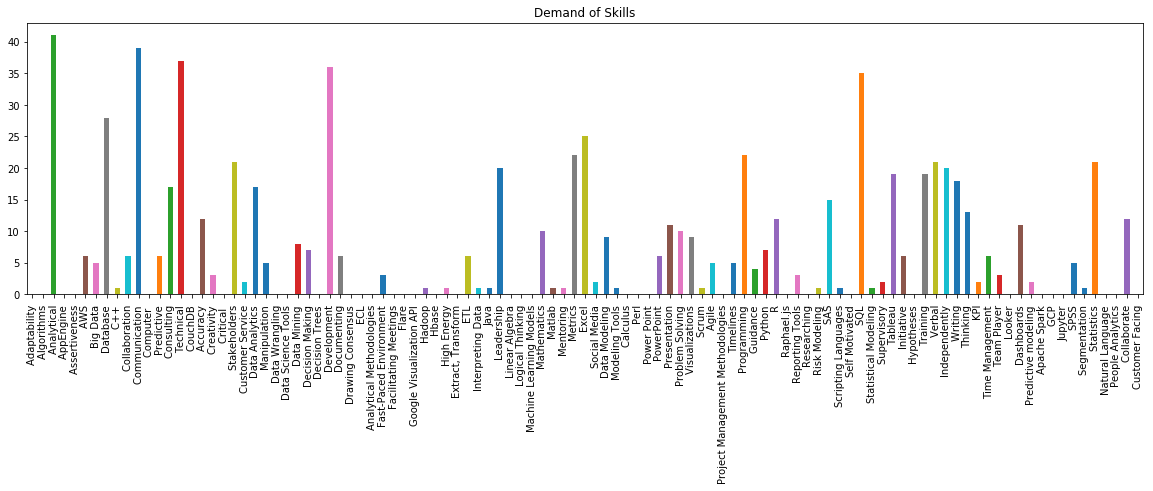

In [37]:
#Data Visualisation 

# Sought after skills, which skills are in demand in north carolina ?
# To get each skill I have used raw data frame (not clustered), which shows exactly which skill is more demanding
#From this we can say that top Top 4 demanding skills for data analyst jobs in North Carolina are : 
#Analytical
#Communication
#Technical
#SQL

import matplotlib.pyplot as plt

sum_of_skills_df = Deepti_data1.sum(numeric_only=True)

sum_of_skills_df.plot(kind='bar', figsize=(20,5), title='Demand of Skills')
plt.show()

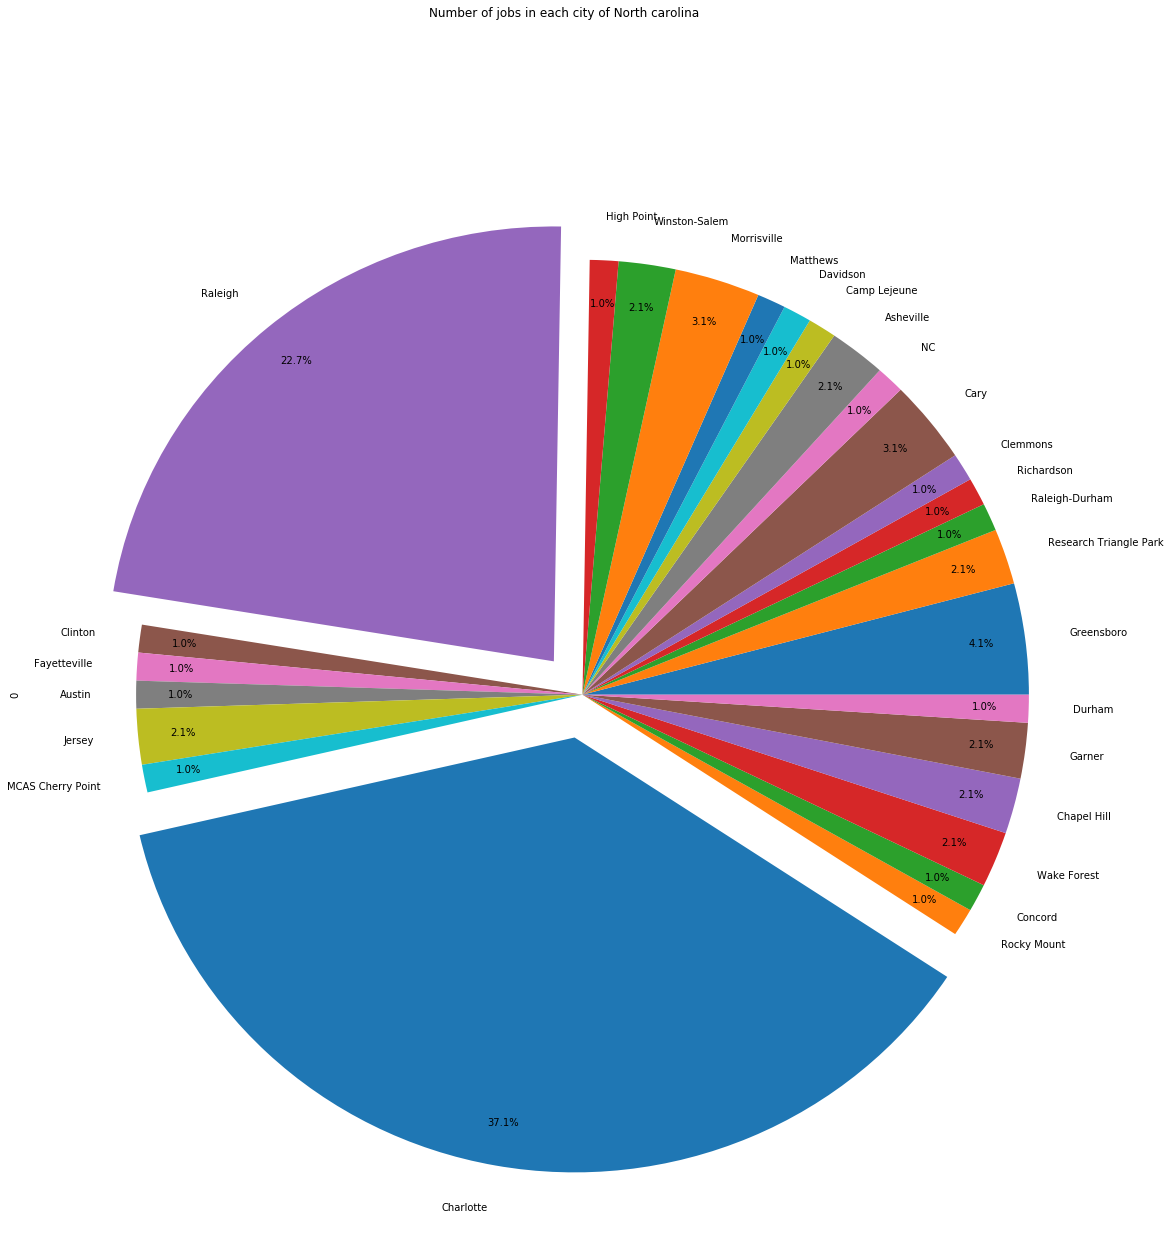

In [33]:
#Plotting number of jobs in each city of North Carolina using pie chart, 
#so that we will know exactly in which city of North Carolina there is more demand for Data Analyst jobs

# From the pie chart we can conclude that, Top 2 cities in NC with more Data Analyst Jobs are:

#Charlotte- 37.1 %
#Raleigh - 22.7 % 

from collections import Counter

city_jobtitle = Deepti_data[['jobtitle','city']].copy()
explode = (0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.1,0,0,0,0,0,0.1,0,0,0,0,0,0)
city_jobtitle['city'].replace(to_replace='', value='NC', inplace=True)
city_jobtitle['city'] = pd.Categorical(city_jobtitle.city)

city_counts = Counter(city_jobtitle['city'])
count_dataframe = pd.DataFrame.from_dict(city_counts, orient='index')
pie=count_dataframe.plot(kind='pie',legend= False, explode=explode ,fontsize=10,autopct='%.1f%%',pctdistance=0.9, labeldistance=1.1,figsize=(20,20), title='Number of jobs in each city of North carolina', subplots= True)


plt.show()

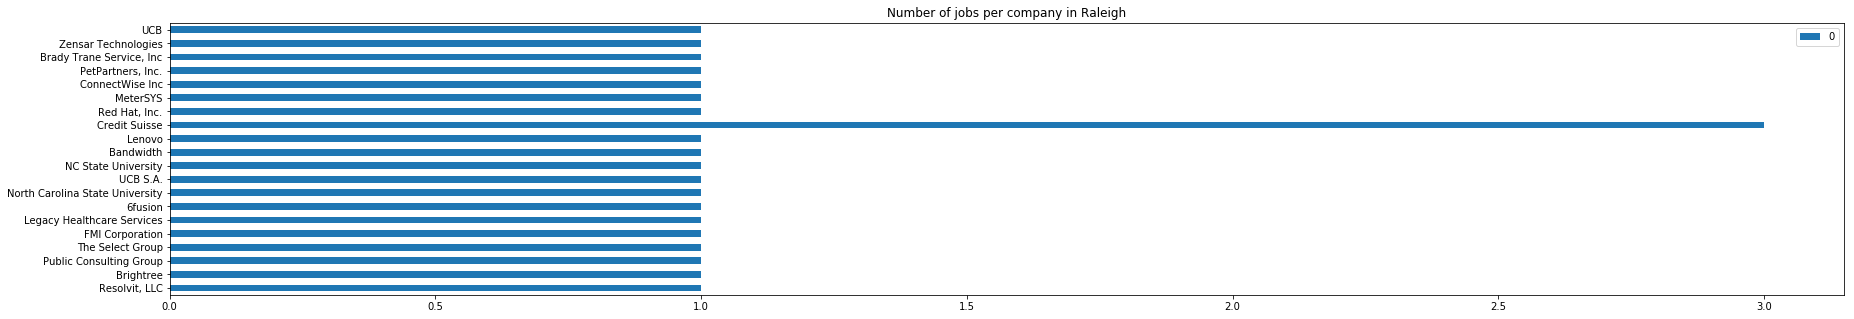

In [35]:
# Number of job openings per company in Raleigh
# From this chart we can say that, most of the jobs for Data analyst role are in Credit Suisse in North Carolina

from collections import Counter
jobs_in_charlotte_df = Deepti_data.loc[Deepti_data['city'] == 'Raleigh']
city_jobtitle_company_in_raleigh = jobs_in_charlotte_df[['jobtitle','city','company']].copy()

company_counts = Counter(city_jobtitle_company_in_raleigh['company'])
count_dataframe = pd.DataFrame.from_dict(company_counts, orient='index')
count_dataframe.plot(kind='barh', figsize=(30,5), title='Number of jobs per company in Raleigh')

plt.show()

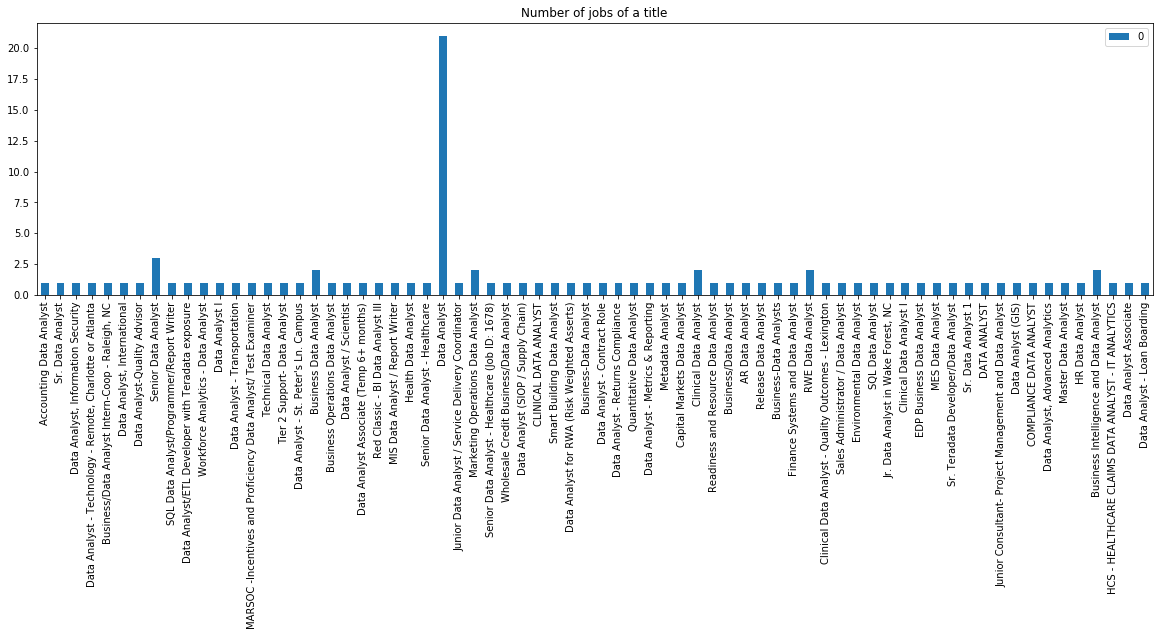

In [36]:

# From this chart, it is clear that if we want to search aata analyst jobs in North Carolina,
#we should not use any other keyword because Data Analyst keyword is most popular keyword when we search for a job

from collections import Counter

city_counts = Counter(city_jobtitle['jobtitle'])
count_dataframe = pd.DataFrame.from_dict(city_counts, orient='index')
count_dataframe.plot(kind='bar', figsize=(20,5), title='Number of jobs of a title')
plt.show()

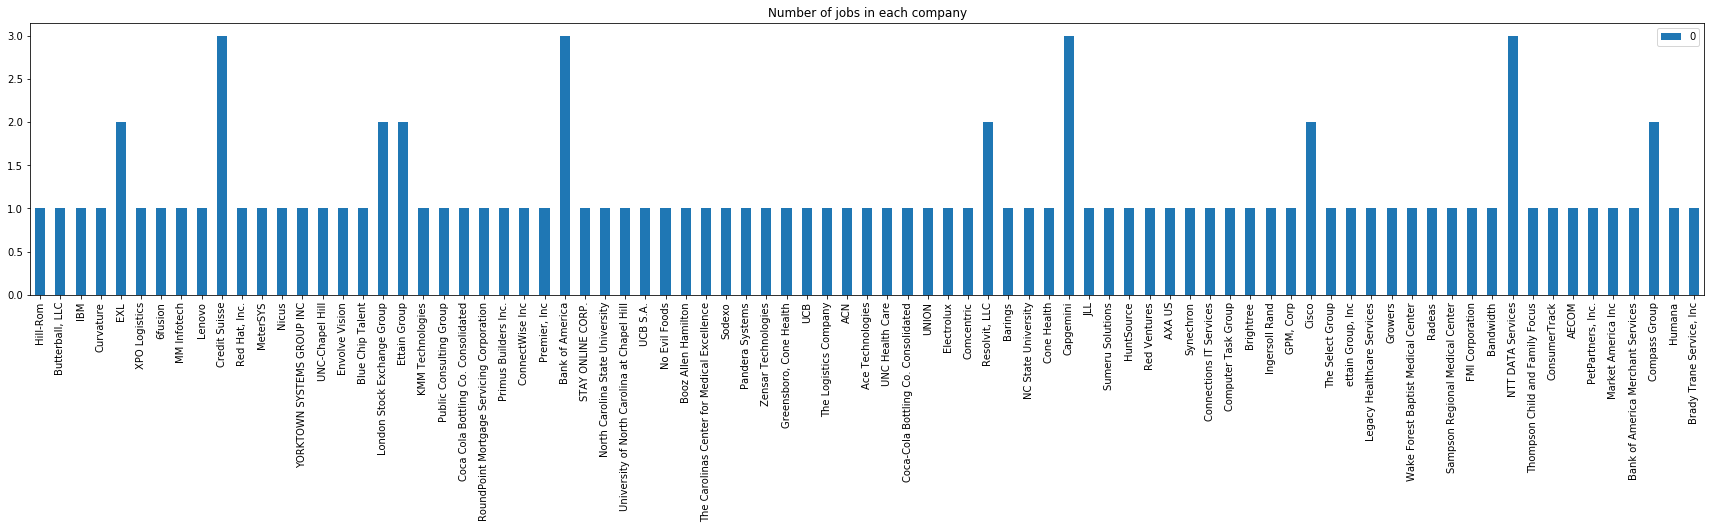

In [41]:
# Number of jobs in each company in North Carolina 
#From this bar chart we can say that Credit Suisse, Bank of America, NTT Data services offers more jobs of Data analyst 
#in North Carolina

from collections import Counter

city_jobtitle_company = Deepti_data[['jobtitle','city','company']].copy()

company_counts = Counter(city_jobtitle_company['company'])
count_dataframe = pd.DataFrame.from_dict(company_counts, orient='index')
count_dataframe.plot(kind='bar', figsize=(30,5), title='Number of jobs in each company')
plt.show()

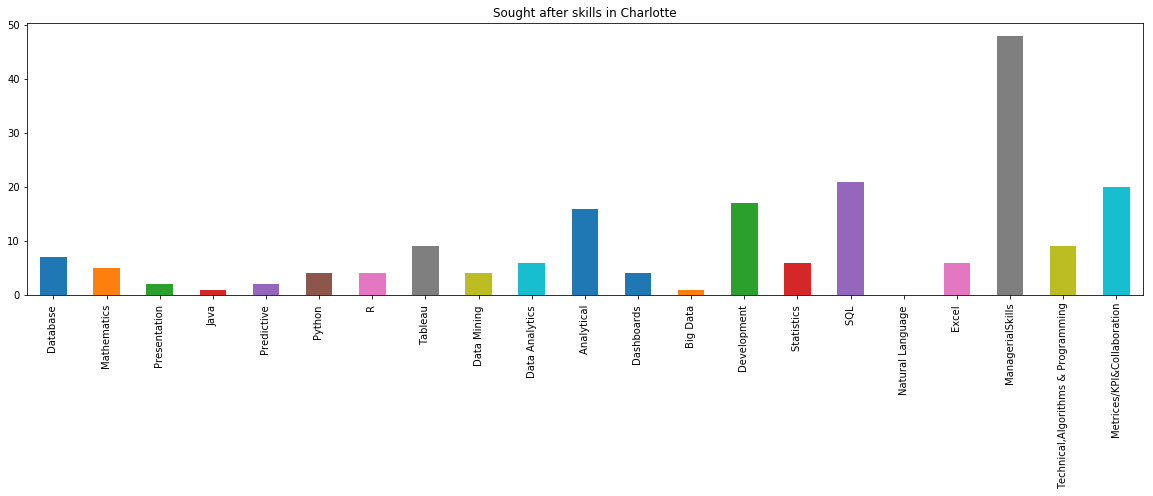

In [40]:
# Sought after skills in Charlotte
#when we consider clustered skillset then most demaanding skills is Managerial skills in Charlotte 

jobs_in_charlotte_df = Deepti_data.loc[Deepti_data['city'] == 'Charlotte']

sum_of_skills_in_charlotte_df = jobs_in_charlotte_df.sum(numeric_only=True)

#city_counts = Counter(city_jobtitle['jobtitle'])
#count_dataframe = pandas.DataFrame.from_dict(city_counts, orient='index')
sum_of_skills_in_charlotte_df.plot(kind='bar', figsize=(20,5), title='Sought after skills in Charlotte')
plt.show()
